## Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [7]:
Df=pd.read_csv("creditcard.csv")
Df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Processing

In [8]:
# Checking if there are any null value
Df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#Information about the dataset
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Seperate the target anf the information
X=Df.drop("Class",axis=1)
y=Df["Class"]
X.shape, y.shape

((284807, 30), (284807,))

In [11]:
# Checking if the dataset is balanced
Df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
class_count_df = pd.DataFrame(Df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0: 'Non-Fraud', 1: 'Fraud'}, inplace=True)
class_count_df.head()

C:\Users\thenu\AppData\Local\Temp\ipykernel_37600\52974115.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  class_count_df['Class'].replace({0: 'Non-Fraud', 1: 'Fraud'}, inplace=True)


,Class,Counts
0,Non-Fraud,284315
1,Fraud,492


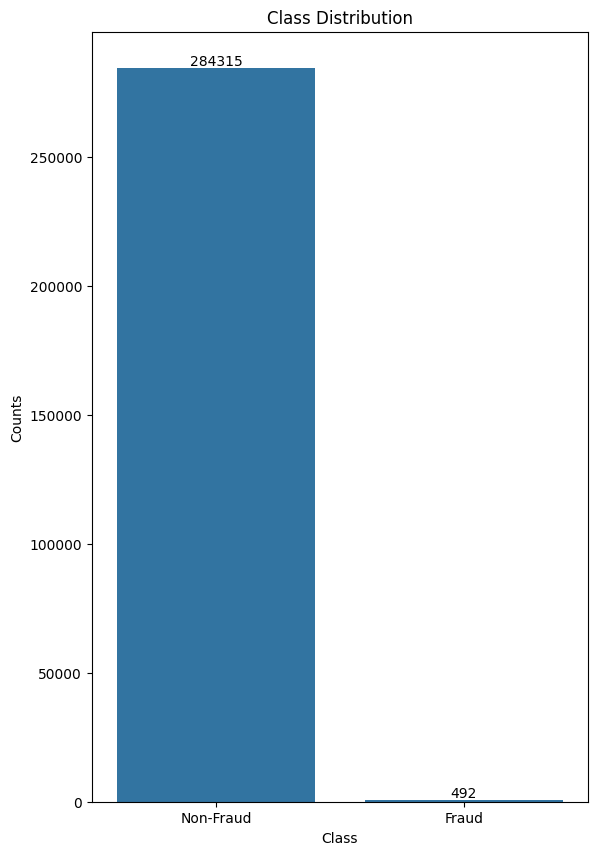

In [13]:
# BAR_GRAPH
fig_1 = plt.figure()
fig_1.set_figheight(8)
fig_1.set_figheight(10)

ax = sns.barplot(x=class_count_df['Class'],
                   y=class_count_df['Counts'])

ax.bar_label(ax.containers[0])
plt.title('Class Distribution')
plt.show()


The above class "1" represents Fraud and class "0" represents non- Fraud and this shows the dataset is imabalnced. Using the SMOTE  and resample techniques below

In [16]:
pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class
sm= SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)
X_resampled.shape, y_resampled.shape
smote_df = pd.DataFrame(X_resampled)
smote_df['Class'] = y_resampled
smote_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
#checking the class counts again
smote_df.Class.value_counts()


Class
0    284315
1    284315
Name: count, dtype: int64

## Finding Anomalies and Visualization

C:\Users\thenu\anaconda3\envs\mlflow2.0\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


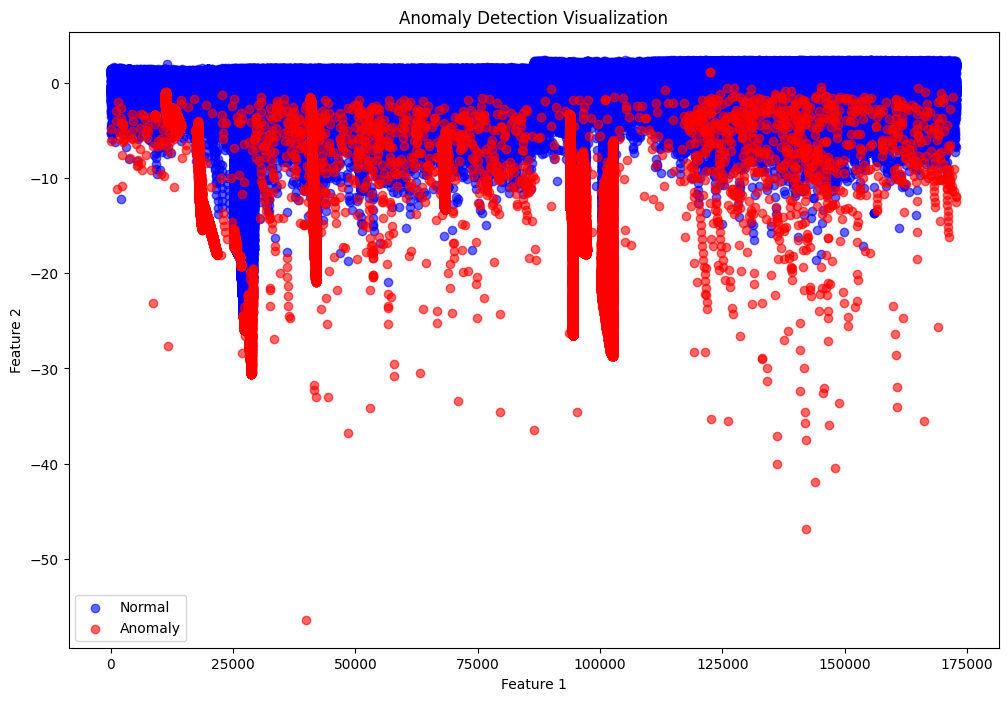

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Assume X_resampled and y_resampled are your data and labels

# Train Anomaly Detection Model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
anomaly_preds = iso_forest.fit_predict(X_resampled)

# Convert anomaly predictions to binary (0 = normal, 1 = anomaly)
anomaly_preds = (anomaly_preds == -1).astype(int)

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Convert X_resampled to a NumPy array for NumPy-style indexing
X_resampled_np = X_resampled.values

# Plot normal data points
plt.scatter(X_resampled_np[anomaly_preds == 0, 0], X_resampled_np[anomaly_preds == 0, 1],
            color='blue', label='Normal', alpha=0.6)



# Plot anomalies
plt.scatter(X_resampled_np[anomaly_preds == 1, 0], X_resampled_np[anomaly_preds == 1, 1],
            color='red', label='Anomaly', alpha=0.6)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection Visualization')
plt.legend()

# Show the plot
plt.show()


Original number of samples: 568630
Number of samples after removing anomalies: 511767


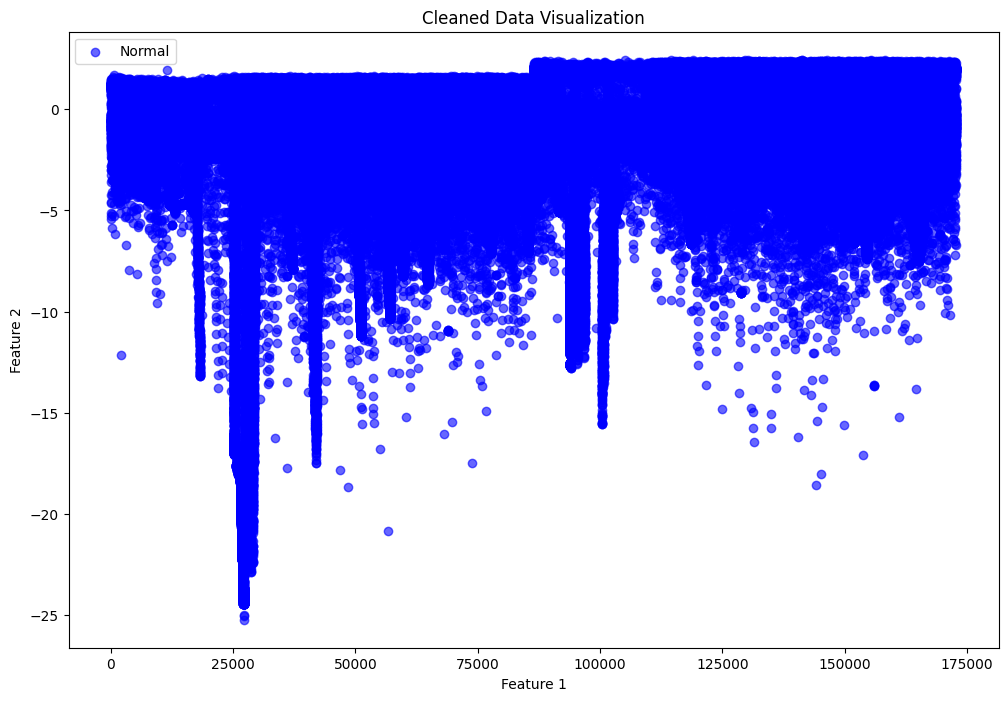

In [21]:
# Step 2: Remove Anomalies
X_cleaned = X_resampled[anomaly_preds == 0]
y_cleaned = y_resampled[anomaly_preds == 0]

# Optional: Verify the number of samples before and after removing anomalies
print(f"Original number of samples: {X_resampled.shape[0]}")
print(f"Number of samples after removing anomalies: {X_cleaned.shape[0]}")

# Step 3: (Optional) Visualize the cleaned data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# Convert X_cleaned to a NumPy array for NumPy-style indexing
X_cleaned_np = X_cleaned.values
plt.scatter(X_cleaned_np[:, 0], X_cleaned_np[:, 1], color='blue', label='Normal', alpha=0.6)
plt.title('Cleaned Data Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Evaluating the model

In [ ]:
#Split the cleaned Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import joblib
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

#Scale teh data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Step 4: Train, Evaluate, and Plot ROC Curves
plt.figure(figsize=(12, 8))

best_model_name = None
best_model = None
best_roc_auc = 0

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    probas = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, probas)

    # Compute ROC-AUC
    roc_auc = roc_auc_score(y_test, probas)

    # Update the best model if this one is better
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_model_name = name
        best_model = model

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.4f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Save the best model
if best_model:
    joblib.dump(best_model, 'best_model.pkl')
    print(f"The best model ({best_model_name}) has been saved to 'best_model.pkl'.")
else:
    print("No model was trained or evaluated.")

In [23]:
y_pred = best_model.predict(X_test_scaled)

Confusion Matrix:
[[56310    12]
 [    0 46032]]


<module 'matplotlib.pyplot' from 'C:\\Users\\thenu\\anaconda3\\envs\\mlflow2.0\\lib\\site-packages\\matplotlib\\pyplot.py'>

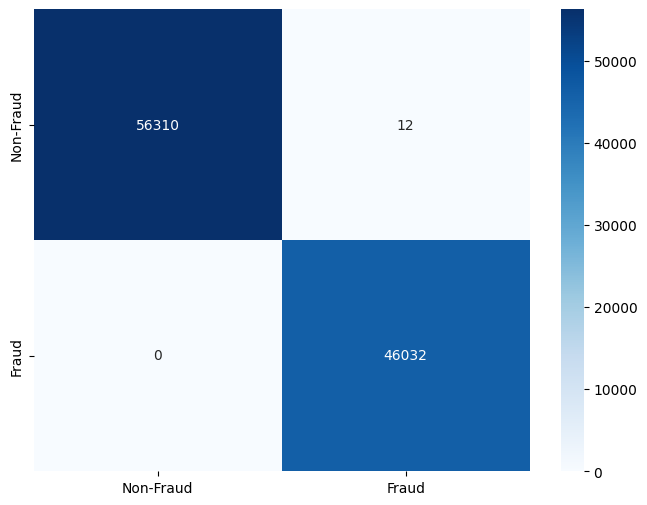

In [24]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt

In [26]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    #mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Iris Classifier")
        mlflow.set_tags({"tag2":"Logistic Regression", "tag3":"Multiclassification using Ovr - One vs rest class"})
        mlflow.sklearn.log_model(model, "model")
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [27]:
from datetime import datetime

experiment_name = "Credit_Card_Fraud_Detection"+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="Credit_Card_Fraud_Detection"+str(datetime.now().strftime("%d-%m-%y"))
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png')

NameError: name 'run_metrics' is not defined

In [ ]:
import mlflow
client = mlflow.tracking.mlflowClient()
client.transition_model_version_stage(
    name =" Credit_card_fraud_Detection",
    version=1,
    stage="Production
)

In [3]:
def create_exp_and_register_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})